<a href="https://colab.research.google.com/github/adihend/semester-4/blob/main/UTS_Analisis_Data_AIR_QUALITY_INDEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



# UTS ANALISIS DATA

> Kelas: TIRP 122PA

> Dosen Pengampu: Herman Ruswan Suwarman, S.Si., M.T.

> Anggota Kelompok:


1.   Kadek Adi hendrawan (22262011190)
2.   List item
3.   List item
4.   List item

Dataset: [AQI Index Data](https://www.kaggle.com/datasets/azminetoushikwasi/aqi-air-quality-index-scheduled-daily-update
)



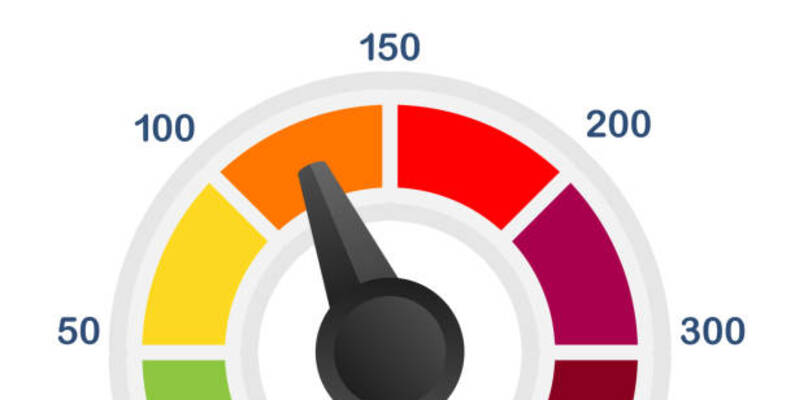

Gambar: Rentang Kualitas Udara





---



In [228]:
# @title Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau
from statsmodels.tsa.arima.model import ARIMA



---



## (1) Mengakses dan Proses Data di Google Colab


In [229]:
# @title Import Data
data = ("/aqi-index.csv")
aqi_data = pd.read_csv(data)
aqi_data

,No,Date,Country,Status,AQI Value
0,1,2022-07-21,Albania,Good,14
1,2,2022-07-21,Algeria,Moderate,65
2,3,2022-07-21,Andorra,Moderate,55
3,4,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,5,2022-07-21,Argentina,Moderate,63
...,...,...,...,...,...
12981,12982,2023-08-10,Uzbekistan,Good,28
12982,12983,2023-08-10,Vatican,Good,34
12983,12984,2023-08-10,Venezuela,Good,26
12984,12985,2023-08-10,Vietnam,Unhealthy for Sensitive Groups,142




---



## (2) Identifikasi Atribut Dataset



> Size, Shape, Index, Monotonic, Count



In [230]:
# @title Size (Ukuran)
ukuran_data = aqi_data.size
print("Ukuran dataset adalah =", ukuran_data)

Ukuran dataset adalah = 64930


In [231]:
# @title Shape (Bentuk)
bentuk_data = aqi_data.shape
print("Shape dari data adalah =", bentuk_data)

Shape dari data adalah = (12986, 5)


In [232]:
# @title Index (Indeks)
indeks_data = aqi_data[1:5]
print("Berikut contoh indeks data range [1:5]:")
indeks_data

Berikut contoh indeks data range [1:5]:


,No,Date,Country,Status,AQI Value
1,2,2022-07-21,Algeria,Moderate,65
2,3,2022-07-21,Andorra,Moderate,55
3,4,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,5,2022-07-21,Argentina,Moderate,63


In [233]:
#@title Uji Monotonic Data (Menggunakan Kendall's tau)
# Mengubah tipe data kolom Date menjadi datetime
aqi_data['Date'] = pd.to_datetime(aqi_data['Date'])

# Mengurutkan dataframe berdasarkan tanggal
aqi_data.sort_values(by='Date', inplace=True)

# Menghitung korelasi Kendall's tau antara tanggal dan AQI Value
tau, p_value = kendalltau(aqi_data.index, aqi_data['AQI Value'])

# Menampilkan hasil
print("Nilai Kendall's tau:", tau)
print("Nilai p-value:", p_value)
print(" ")
print("Kesimpulannya adalah:")
print("(1) hasil nilai Kendall's tau menunjukan mendekati nilai 0, yang artinya tidak ad korelasi antara waktu dan nilai AQI")
print("(2) Nilai p_value menunjukan nilai tinggi yang artinya tidak ada cukup bukti untuk menolak H0")
print("Hasil uji monotonic adalah tidak ada trend yang jelas dari nilai AQI seiring dengan berjalannya waktu")

Nilai Kendall's tau: -0.0004909624423266545
Nilai p-value: 0.9334123696301362
 
Kesimpulannya adalah:
(1) hasil nilai Kendall's tau menunjukan mendekati nilai 0, yang artinya tidak ad korelasi antara waktu dan nilai AQI
(2) Nilai p_value menunjukan nilai tinggi yang artinya tidak ada cukup bukti untuk menolak H0
Hasil uji monotonic adalah tidak ada trend yang jelas dari nilai AQI seiring dengan berjalannya waktu


In [234]:
#@title Count
data_count = aqi_data.count()
print("Data terhitung adalah sebagai berikut:")
data_count

Data terhitung adalah sebagai berikut:


No           12986
Date         12986
Country      12986
Status       12986
AQI Value    12986
dtype: int64



---



## (3) Data Cleansing

> Identifikasi Missing Value

> Menghilangkan Data Duplicate

(1) Menggunakan data info sebagai berikut:
<class 'pandas.core.frame.DataFrame'>
Index: 12986 entries, 0 to 12985
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   No         12986 non-null  int64         
 1   Date       12986 non-null  datetime64[ns]
 2   Country    12986 non-null  object        
 3   Status     12986 non-null  object        
 4   AQI Value  12986 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 608.7+ KB
None
 
(2) Menggunakan data describe sebagai berikut:
                 No                           Date     AQI Value
count  12986.000000                          12986  12986.000000
mean    6493.500000  2022-10-24 09:26:11.846603776     61.940936
min        1.000000            2022-07-21 00:00:00      1.000000
25%     3247.250000            2022-08-08 00:00:00     29.000000
50%     6493.500000            2022-08-30 00:00:00     53.000000
75%     97

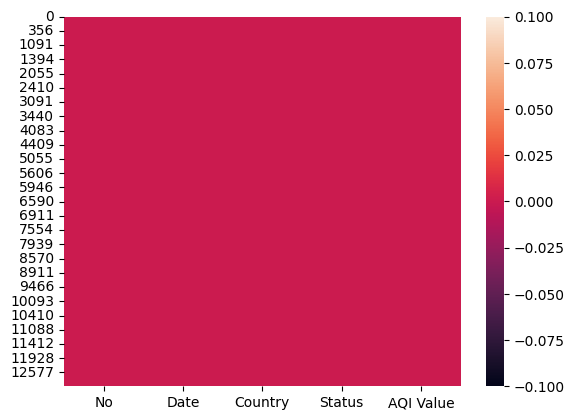

-> Hasil visualisasi menunjukan bahwa warna merah adalah mendekati 0, dan semua variabel berwarna merah. Artinya tidak ada data yang hilang.


In [235]:
#@title Identifikasi Missing Value (Menggunakan Info, Describe, Isnull, dan Visualisasi HeatMap)
print("(1) Menggunakan data info sebagai berikut:")
info = aqi_data.info()
print(info)
print(" ")
print("=================================================================")
print("(2) Menggunakan data describe sebagai berikut:")
describe = aqi_data.describe()
print(describe)
print(" ")
print("=================================================================")
print("(3) Menggunakan isnull, artinya melihat cell kosong sebagai berikut:")
data_hilang = aqi_data.isnull()
print(data_hilang)
print(" ")
missing_values = aqi_data.isnull()
print(missing_values.sum())
print("-> Perhitungan isnull menunjukan semua kolom data memiliki nilai 0, yang artinya tidak ada data yang hilang.")
print(" ")
print("=================================================================")
print("(4) Menggunakan visualisasi heatmap sebagai berikut:")
sns.heatmap(aqi_data.isnull(), cbar=True)
plt.show()
print("-> Hasil visualisasi menunjukan bahwa warna merah adalah mendekati 0, dan semua variabel berwarna merah. Artinya tidak ada data yang hilang.")

In [236]:
#@title Identifikasi Duplicate
hitung_duplicate = aqi_data.duplicated().sum()

# Menampilkan jumlah data duplikat
print("Jumlah data duplikat:", hitung_duplicate)

# Menampilkan baris duplikat jika ada
if hitung_duplicate > 0:
    baris_duplikasi = aqi_data[aqi_data.duplicated()]
    print("Baris duplikat:")
    print(baris_duplikasi)
else:
    print("Tidak ada baris duplikat.")

Jumlah data duplikat: 0
Tidak ada baris duplikat.


Menggunakan IQR (Interquartile Range)
Outlier:
          No       Date                   Country          Status  AQI Value
204      205 2022-07-21                      Iraq       Unhealthy        194
203      204 2022-07-21                      Iran  Very Unhealthy        246
169      170 2022-07-21                     Chile  Very Unhealthy        212
254      255 2022-07-21              Saudi Arabia  Very Unhealthy        272
274      275 2022-07-21                    Uganda       Unhealthy        189
...      ...        ...                       ...             ...        ...
12923  12924 2023-08-10                Kyrgyzstan       Unhealthy        191
12936  12937 2023-08-10                    Mexico  Very Unhealthy        211
12943  12944 2023-08-10               Netherlands       Hazardous        406
12830  12831 2023-08-10              South Africa       Unhealthy        172
12847  12848 2023-08-10  United States of America       Unhealthy        169

[402 rows x 5 columns]
 
 


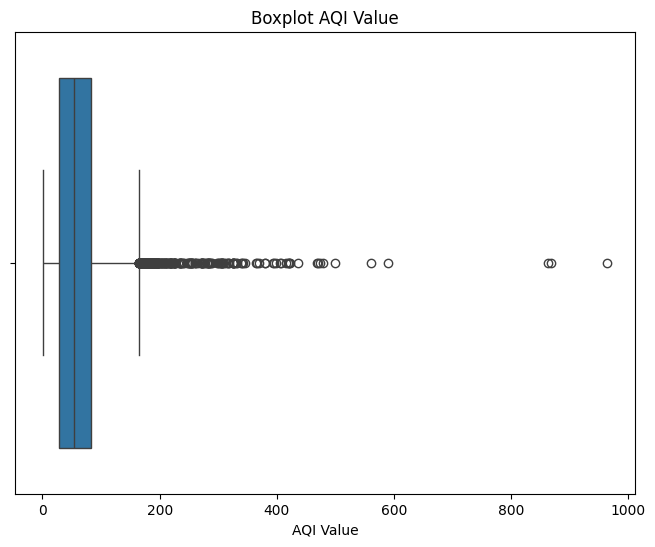

In [237]:
#@title Identifikasi Outlier
print("Menggunakan IQR (Interquartile Range)")
Q1 = aqi_data['AQI Value'].quantile(0.25)
Q3 = aqi_data['AQI Value'].quantile(0.75)
IQR = Q3 - Q1
# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identifikasi outlier
outliers = aqi_data[(aqi_data['AQI Value'] < lower_bound) | (aqi_data['AQI Value'] > upper_bound)]
# Menampilkan outlier
print("Outlier:")
print(outliers)

print(" ")
print(" ")

plt.figure(figsize=(8, 6))
sns.boxplot(x='AQI Value', data=aqi_data)
plt.title('Boxplot AQI Value')
plt.xlabel('AQI Value')
plt.show()



---



## (4) Kebutuhan Data dan Analisis

> Korelasi

> Penggunaan Data



● Tugas yang dilakukan pada data ini adalah berikut:


1. Analisis Runtut Waktu dan Prediksi
2. Meanmpilkan negara yang memiliki AQI value tertinggi
3. Menampilkan negara yang memiliki AQI value terendah
4. Menampilkan negara yang memiliki kualitas udara Good
5. Menampilkan negara yang memiliki kualitas udara Hazardous
6. Menampilkan persentase jumlah status dengan piechart

In [238]:
#@title Seleksi Kolom
aqi_baru = aqi_data[["Date", "Country", "Status", "AQI Value"]]
print(aqi_baru)

            Date      Country     Status  AQI Value
0     2022-07-21      Albania       Good         14
180   2022-07-21  El Salvador   Moderate         80
181   2022-07-21      Estonia       Good         16
182   2022-07-21     Ethiopia  Unhealthy        161
183   2022-07-21      Finland       Good         25
...          ...          ...        ...        ...
12812 2023-08-10      Nigeria       Good         34
12813 2023-08-10       Norway       Good         21
12814 2023-08-10     Pakistan   Moderate         54
12800 2023-08-10     Malaysia   Moderate         65
12985 2023-08-10       Zambia   Moderate         79

[12986 rows x 4 columns]




---



## (5) Penanganan Missing Value



1. Karena tidak ada missing value, maka tidak ada baris atau kolom yang perlu di hapus menggunakan drop ataupun dropna.
2. Tidak ada data yang aneh, outlier belum di di ubah karena belum dilakukan analisis lanjutan dan belum terlihat mempengaruhi data.



---



## (6) Melakukan Visualisasi Data

> Analisis Time Series dan Prediksi

Analisis time series dengan model ARIMA (melihat rata-rata bergerak)


<ipython-input-239-c3dfb3ad0bc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_baru['Date'] = pd.to_datetime(aqi_baru['Date'])


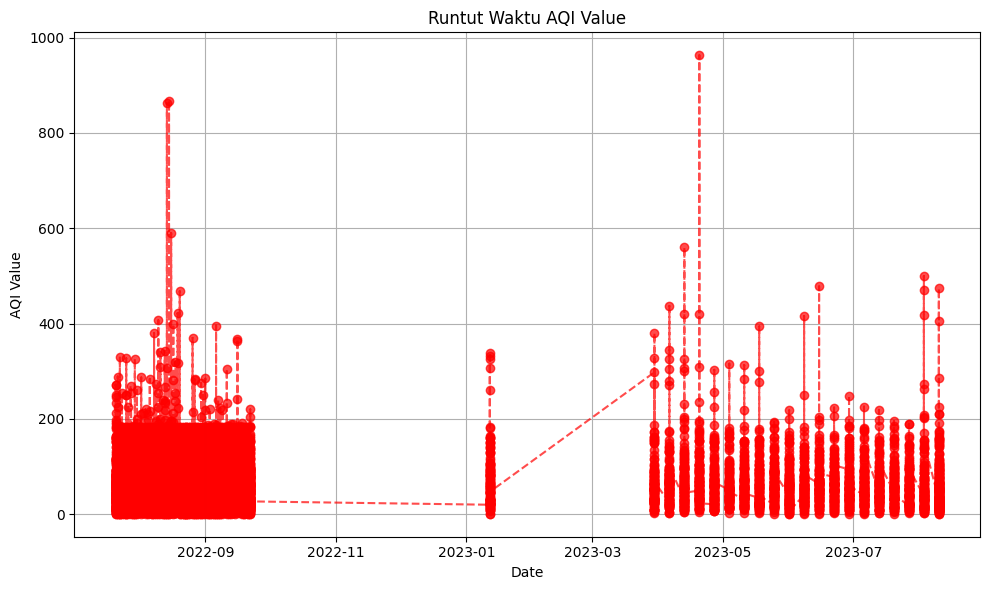

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hasil prediksi untuk 10 hari berikutnya:
12986    46.918376
12987    49.335655
12988    50.994980
12989    57.363533
12990    58.456475
12991    57.954275
12992    53.259197
12993    54.323179
12994    55.173497
12995    56.145830
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [239]:
#@title Analisis Time Series dan Prediksi
aqi_baru['Date'] = pd.to_datetime(aqi_baru['Date'])
aqi_baru.set_index('Date', inplace=True)

print("Analisis time series dengan model ARIMA (melihat rata-rata bergerak)")
# Visualisasi Time Series
plt.figure(figsize=(10, 6))
plt.plot(aqi_baru.index, aqi_baru['AQI Value'], marker='o', linestyle='--', color='r', alpha=0.7)
plt.title('Runtut Waktu AQI Value')
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# Modeling (contoh dengan ARIMA)
model = ARIMA(aqi_baru['AQI Value'], order=(5,1,0))
model_fit = model.fit()

# Prediksi
forecast = model_fit.forecast(steps=10)
# Menampilkan hasil prediksi
print("========================================")
print("Hasil prediksi untuk 10 hari berikutnya:")
print(forecast)

### Plot Tampilan

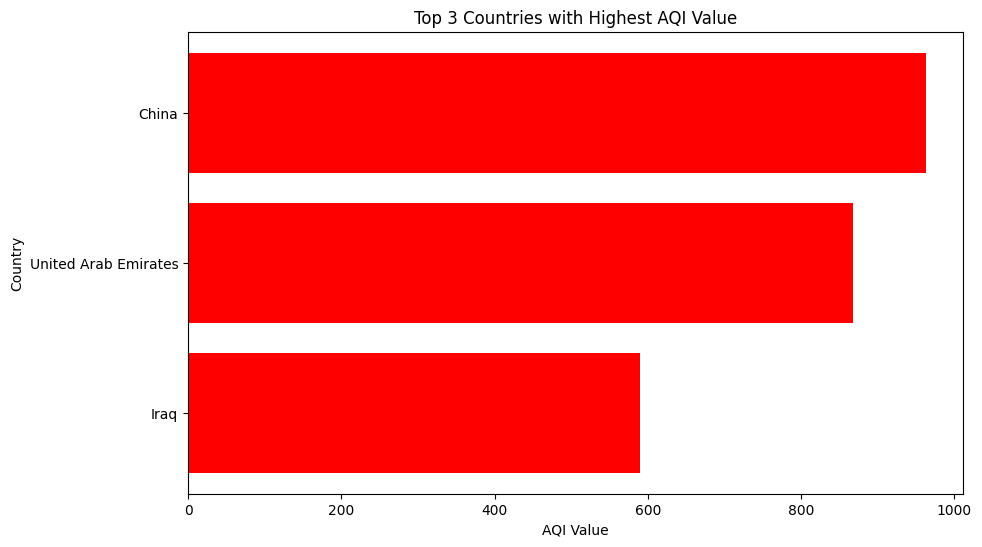

In [277]:
#@title Negara dengan AQI Value tertinggi
df = aqi_baru
df_sorted = df.sort_values(by='AQI Value')
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Country'].tail(4), df_sorted['AQI Value'].tail(4), color='red')
plt.xlabel('AQI Value')
plt.ylabel('Country')
plt.title('Top 3 Countries with Highest AQI Value')
plt.show()

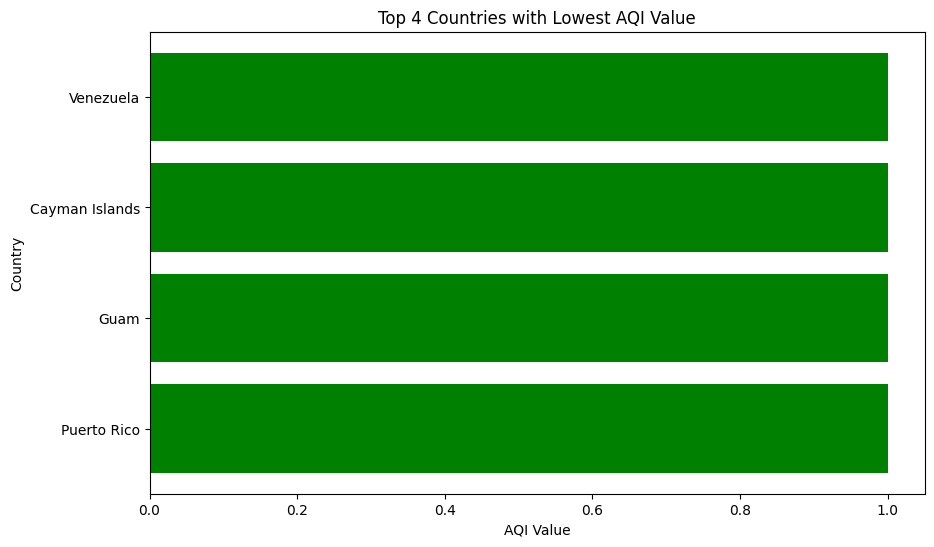

In [276]:
#@title Negara dengan AQI Value terendah
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Country'].head(4), df_sorted['AQI Value'].head(4), color='green')
plt.xlabel('AQI Value')
plt.ylabel('Country')
plt.title('Top 4 Countries with Lowest AQI Value')
plt.show()

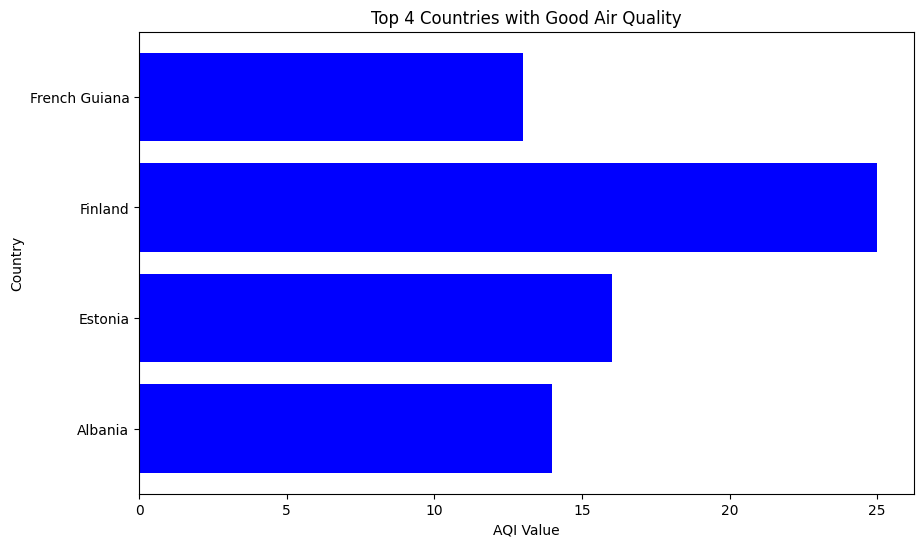

In [270]:
#@title Good Country
good_quality = df[df['Status'] == 'Good'].head(4)
plt.figure(figsize=(10, 6))
plt.barh(good_quality['Country'], good_quality['AQI Value'], color='blue')
plt.xlabel('AQI Value')
plt.ylabel('Country')
plt.title('Top 4 Countries with Good Air Quality')
plt.show()

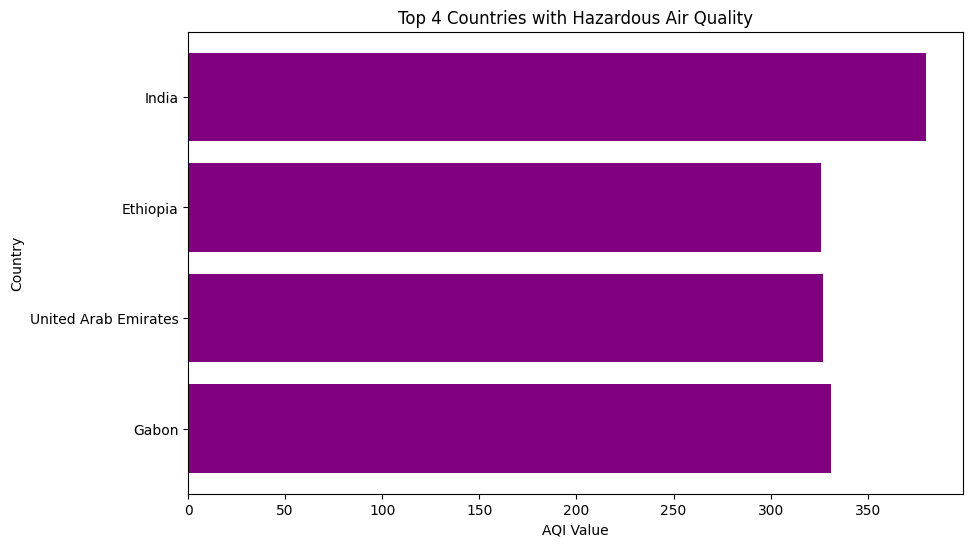

In [267]:

#@title Hazardous Country
hazardous_quality = df[df['Status'] == 'Hazardous'].head(4)
plt.figure(figsize=(10, 6))
plt.barh(hazardous_quality['Country'], hazardous_quality['AQI Value'], color='purple')
plt.xlabel('AQI Value')
plt.ylabel('Country')
plt.title('Top 4 Countries with Hazardous Air Quality')
plt.show()

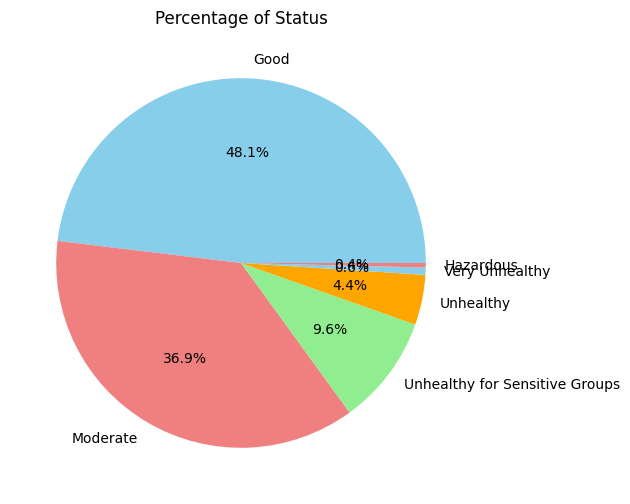

In [281]:
#@title Persentase Status
status_counts = df['Status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Percentage of Status')
plt.show()